In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper measurments
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurements = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [42]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
result = session.query(measurements,func.max(measurements.date)).group_by(measurements.station)
for row,i in result:
    row.date = row.date
print('Last date:', row.date)

# query_date = dt.row.date - dt.timedelta(days=365)
query_date = dt.date(2017,8,23) - dt.timedelta(days=365)
print("First date:", query_date)

# Perform a query to retrieve the data and precipitation scores
data = session.query(measurements.date, measurements.prcp) .\
    filter(measurements.date >= query_date)
for i in data:
    print(i)



Last date: 2017-08-23
First date: 2016-08-23
('2016-08-23', 0.0)
('2016-08-24', 0.08)
('2016-08-25', 0.08)
('2016-08-26', 0.0)
('2016-08-27', 0.0)
('2016-08-28', 0.01)
('2016-08-29', 0.0)
('2016-08-30', 0.0)
('2016-08-31', 0.13)
('2016-09-01', 0.0)
('2016-09-02', 0.0)
('2016-09-03', 0.0)
('2016-09-04', 0.03)
('2016-09-05', None)
('2016-09-06', None)
('2016-09-07', 0.05)
('2016-09-08', 0.0)
('2016-09-09', 0.03)
('2016-09-10', 0.0)
('2016-09-11', 0.05)
('2016-09-12', 0.0)
('2016-09-13', 0.02)
('2016-09-14', 1.32)
('2016-09-15', 0.42)
('2016-09-16', 0.06)
('2016-09-17', 0.05)
('2016-09-18', 0.0)
('2016-09-19', 0.0)
('2016-09-20', 0.0)
('2016-09-21', 0.0)
('2016-09-22', 0.02)
('2016-09-23', 0.0)
('2016-09-24', 0.0)
('2016-09-25', 0.0)
('2016-09-26', 0.06)
('2016-09-27', 0.02)
('2016-09-28', 0.0)
('2016-09-29', 0.0)
('2016-09-30', 0.0)
('2016-10-01', 0.0)
('2016-10-02', 0.0)
('2016-10-03', 0.0)
('2016-10-04', 0.0)
('2016-10-05', 0.0)
('2016-10-06', 0.0)
('2016-10-07', 0.0)
('2016-10-08', 0.

('2017-05-11', 0.0)
('2017-05-12', 0.0)
('2017-05-13', 0.0)
('2017-05-14', 0.0)
('2017-05-15', 0.06)
('2017-05-16', 0.0)
('2017-05-17', 0.0)
('2017-05-18', 0.46)
('2017-05-20', None)
('2017-05-21', 0.0)
('2017-05-22', 0.0)
('2017-05-23', 0.0)
('2017-05-24', 0.61)
('2017-05-25', 0.55)
('2017-05-26', 0.0)
('2017-05-27', 0.0)
('2017-05-28', 0.0)
('2017-05-29', 0.0)
('2017-05-30', 0.11)
('2017-05-31', 0.0)
('2017-06-01', 0.0)
('2017-06-02', 0.0)
('2017-06-03', 0.15)
('2017-06-04', 0.0)
('2017-06-05', 0.0)
('2017-06-06', 0.0)
('2017-06-07', 0.0)
('2017-06-08', 0.0)
('2017-06-09', 0.0)
('2017-06-10', 0.13)
('2017-06-11', 0.25)
('2017-06-12', 0.14)
('2017-06-13', 0.03)
('2017-06-14', 0.06)
('2017-06-15', 0.0)
('2017-06-16', 0.0)
('2017-06-17', 0.0)
('2017-06-18', 0.0)
('2017-06-19', 0.01)
('2017-06-21', None)
('2017-06-22', 0.0)
('2017-06-23', 0.05)
('2017-06-24', 0.0)
('2017-06-25', 0.0)
('2017-06-26', 0.0)
('2017-06-27', 0.0)
('2017-06-28', 0.0)
('2017-06-29', 0.0)
('2017-06-30', 0.07)
('20

In [43]:
last_date

('2017-08-23')

In [44]:
# Save the query results as a Pandas DataFrame and set the index to the date column
hawaii_data_old = pd.DataFrame(data, columns = ['Date','Precipitation'])
hawaii_data_clean = hawaii_data_old.set_index('Date', inplace=False)

# Sort the dataframe by date
hawaii_data_clean = hawaii_data_clean.sort_values(by=['Date'])
hawaii_data_clean.head()


,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


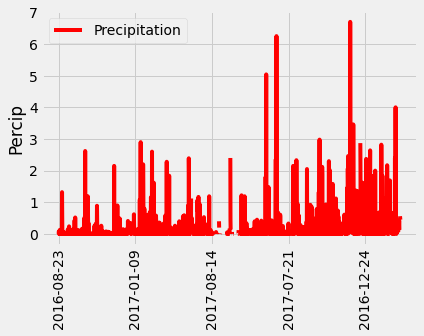

In [45]:
# Use Pandas Plotting with Matplotlib to plot the data

import matplotlib.pyplot as plt

ax = plt.gca()

hawaii_data_old.plot(kind='line',x='Date',y='Precipitation', color='red',ax=ax)
plt.xticks(rotation=90)
plt.xlabel("")
plt.ylabel("Percip")
plt.show()



In [46]:
# Use Pandas to calcualte the summary statistics for the precipitation data
hawaii_data_clean = hawaii_data_clean.describe()
hawaii_data_clean

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [47]:
# Design a query to show how many stations are available in this dataset?
session.query(station.station).count()

9

In [48]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_station = session.query(measurements.station,func.count(measurements.station)).\
            group_by(measurements.station).\
            order_by(func.count(measurements.station).desc()).all()
active_station


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [49]:
# What are the most active stations? (i.e. what stations have the most rows)?
print("Most active station is: ", active_station[0])

Most active station is:  ('USC00519281', 2772)


In [50]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
act_station = active_station[0][0]

more_data = session.query(measurements.station,func.max(measurements.tobs),func.min(measurements.tobs),func.avg(measurements.tobs)).\
                          filter(measurements.station==act_station).all()

print(more_data)

[('USC00519281', 85.0, 54.0, 71.66378066378067)]


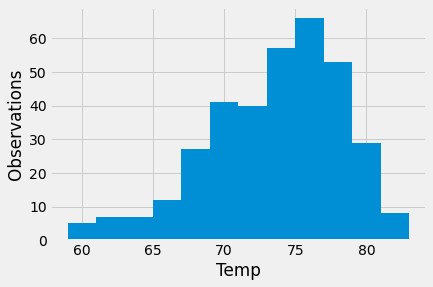

In [62]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
data_tobs =session.query(measurements.tobs).filter(measurements.station==act_station).filter(measurements.date>=query_date).all()

new_data_tobs = pd.DataFrame(data_tobs,columns=['temp'])

plt.hist(new_data_tobs['temp'], bins = 12)
plt.xlabel("Temp")
plt.ylabel("Observations")
plt.show()




## Bonus Challenge Assignment

In [20]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

NameError: name 'Measurement' is not defined

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
